# Life Expectancy Dataset 

## Context

Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

## Content
The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

Dataset: https://www.kaggle.com/kumarajarshi/life-expectancy-who


## Columns:

    - Country 
    - Year
    - Status: Developed or Developing status
    - Life expectancy: Life Expectancy in age 
    - Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population) 
    - infant deaths: Number of Infant Deaths per 1000 population
    - Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
    - percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
    - Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
    - Measles: Measles number of reported cases per 1000 population
    - BMI: Average Body Mass Index of entire population
    - under-five deaths: Number of under-five deaths per 1000 population
    - Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
    - Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
    - Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
    - HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
    - GDP: Gross Domestic Product per capita (in USD)
    - Population: Population of the country
    - thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
    - thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
    - Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
    - Schooling: Number of years of Schooling(years)
   
   

## Import All libraries


In [1]:
import os, datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso,Ridge, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

## Load the Dataset 

In [2]:
data = pd.read_csv('datasets/life_expectancy.csv')

data.head(5)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Data Wrangling

In [3]:
data.shape

(2938, 22)

### Null Check

In [4]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### Processing the null values

In this case are many null values. Since the life expectancy depends on the status of country and particular country's detail, we filled the nan values with mean value with respect to country. 

Filling nan values with the mean

In [5]:
countries = data['Country'].unique()

nan_cols = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure','Diphtheria ', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Population', 'Income composition of resources']

for cols in nan_cols:
    for country in countries:
        data.loc[data['Country']== country, cols] = data.loc[data['Country'] == country, cols].fillna(data[data['Country'] == country][cols].mean())

In [6]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
 HIV/AIDS                            0
GDP                                405
Population                         648
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
data = data.dropna()

data.shape

(2128, 22)

In [8]:
data['Status'].value_counts()

Developing    1824
Developed      304
Name: Status, dtype: int64

In [9]:
data['Country'].value_counts()

Bulgaria                    16
Turkmenistan                16
Canada                      16
Netherlands                 16
Philippines                 16
                            ..
Uganda                      16
Central African Republic    16
Nepal                       16
Malaysia                    16
Angola                      16
Name: Country, Length: 133, dtype: int64

## Exploratory Data Analysis

<AxesSubplot:>

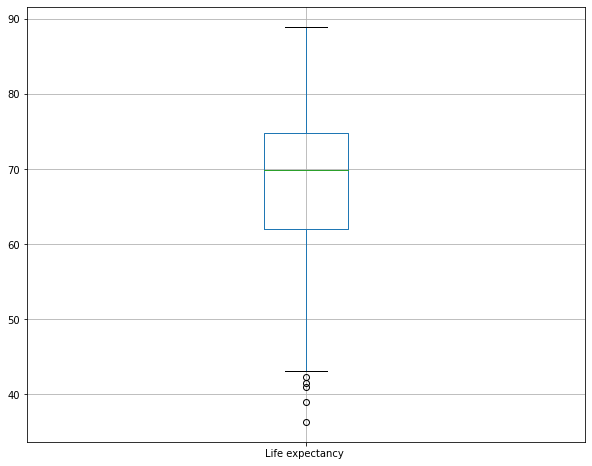

In [10]:
plt.figure(figsize=(10,8))

data.boxplot('Life expectancy ')

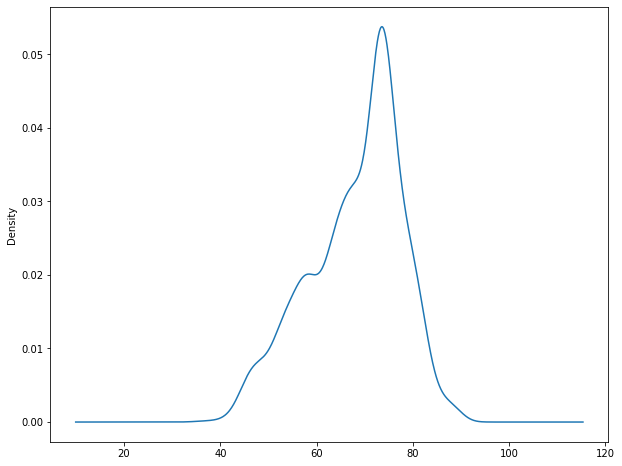

In [11]:
plt.figure(figsize=(10, 8))

data['Life expectancy '].plot.kde()

plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total expenditure')

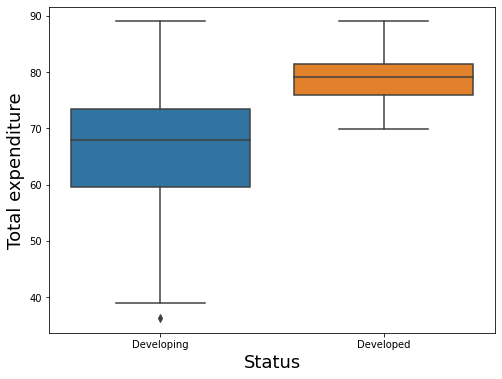

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot('Status', 'Life expectancy ', data = data)

plt.xlabel('Status', fontsize= 18)
plt.ylabel('Total expenditure', fontsize=18)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


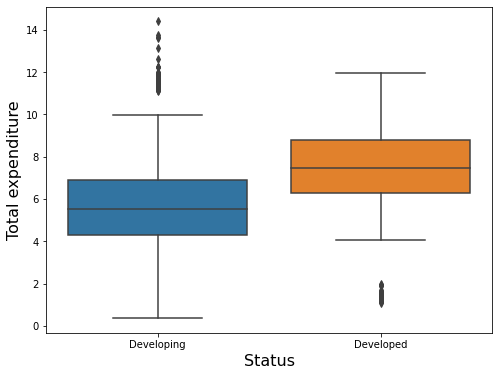

In [13]:
plt.figure(figsize=(8, 6))

sns.boxplot('Status', 'Total expenditure', data = data)

plt.xlabel('Status', fontsize = 16)
plt.ylabel('Total expenditure', fontsize = 16)

plt.show()

In [14]:
data_corr = data[['Life expectancy ', 
                  'Adult Mortality', 
                  'Schooling', 
                  'Total expenditure', 
                  'Diphtheria ', 
                  'GDP',
                  'Population']].corr()
data_corr

,Life expectancy,Adult Mortality,Schooling,Total expenditure,Diphtheria,GDP,Population
Life expectancy,1.000000,-0.662604,0.746619,0.203689,0.449975,0.445425,-0.011420
Adult Mortality,-0.662604,1.000000,-0.408661,-0.097938,-0.212157,-0.259500,-0.021050
Schooling,0.746619,-0.408661,1.000000,0.261679,0.432891,0.471767,-0.022453
Total expenditure,0.203689,-0.097938,0.261679,1.000000,0.183238,0.212498,-0.079752
Diphtheria,0.449975,-0.212157,0.432891,0.183238,1.000000,0.190957,-0.024167
GDP,0.445425,-0.259500,0.471767,0.212498,0.190957,1.000000,-0.016800
Population,-0.011420,-0.021050,-0.022453,-0.079752,-0.024167,-0.016800,1.000000


Below the heatmap shows that 'Adult mortality' and 'Schooling' is highly corelated with 'Life expectancy'

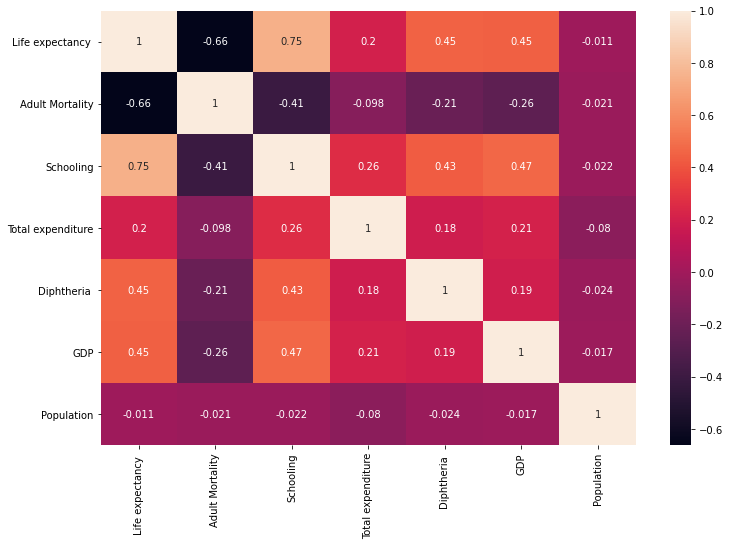

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(data_corr, annot=True)

plt.show()

## Feature Engineering

### Splitting the data into features and target variables

In [16]:
features = data.drop('Life expectancy ', axis =1)

target = data[['Life expectancy ']]

In [17]:
features.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [18]:
target.columns

Index(['Life expectancy '], dtype='object')

In [19]:
target.sample(5)

,Life expectancy
1814,69.6
1249,70.0
2257,62.1
2498,47.8
80,76.3


In [20]:
features = features.drop('Country', axis=1)

features.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [21]:
categorical_features = features['Status'].copy()

categorical_features.head()

0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object

In [22]:
categorical_features = pd.get_dummies(categorical_features)
categorical_features.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [23]:
numeric_features = features.drop(['Status'], axis=1)
numeric_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [24]:
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,2.007500e+03,4.610856e+00,2000.00000,2003.750000,2.007500e+03,2.011250e+03,2.015000e+03
Adult Mortality,2128.0,1.743003e+02,1.297593e+02,1.00000,76.000000,1.520000e+02,2.412500e+02,7.230000e+02
infant deaths,2128.0,3.590273e+01,1.362247e+02,0.00000,1.000000,4.000000e+00,2.400000e+01,1.800000e+03
Alcohol,2128.0,4.436893e+00,3.962858e+00,0.01000,0.827500,3.735000e+00,7.162500e+00,1.787000e+01
percentage expenditure,2128.0,6.400720e+02,1.710799e+03,0.00000,19.883256,8.367799e+01,4.313651e+02,1.896135e+04
Hepatitis B,2128.0,7.727206e+01,2.526004e+01,2.00000,68.000000,8.700000e+01,9.500000e+01,9.900000e+01
Measles,2128.0,2.657467e+03,1.191224e+04,0.00000,0.000000,2.000000e+01,4.592500e+02,2.121830e+05
BMI,2128.0,3.669196e+01,1.984373e+01,1.40000,18.400000,3.885000e+01,5.520000e+01,7.760000e+01
under-five deaths,2128.0,4.981720e+01,1.851527e+02,0.00000,1.000000,4.000000e+00,3.425000e+01,2.500000e+03
Polio,2128.0,8.057201e+01,2.417005e+01,3.00000,75.000000,9.100000e+01,9.600000e+01,9.900000e+01


In [25]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features), 
                                columns=numeric_features.columns,
                                index=numeric_features.index)
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,0.000000e+00,1.000235,-1.626978,-0.813489,0.000000,0.813489,1.626978
Adult Mortality,2128.0,-5.342427e-17,1.000235,-1.335866,-0.757737,-0.171899,0.516075,4.229591
infant deaths,2128.0,0.000000e+00,1.000235,-0.263617,-0.256275,-0.234247,-0.087396,12.952948
Alcohol,2128.0,1.402387e-16,1.000235,-1.117358,-0.911020,-0.177159,0.687950,3.390549
percentage expenditure,2128.0,1.335607e-17,1.000235,-0.374224,-0.362599,-0.325301,-0.122022,10.711711
Hepatitis B,2128.0,3.005115e-17,1.000235,-2.980588,-0.367151,0.385202,0.701983,0.860373
Measles,2128.0,0.000000e+00,1.000235,-0.223140,-0.223140,-0.221460,-0.184578,17.593236
BMI,2128.0,4.674623e-17,1.000235,-1.778912,-0.922017,0.108777,0.932909,2.061994
under-five deaths,2128.0,-1.669508e-17,1.000235,-0.269123,-0.263721,-0.247514,-0.084097,13.236418
Polio,2128.0,8.347542e-17,1.000235,-3.210181,-0.230588,0.431544,0.638460,0.762610


In [26]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1,
                               sort=False)

processed_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,1.626978,0.683732,0.191620,-1.117358,-0.332550,-0.485943,-0.126242,-0.886733,0.179261,-3.086031,...,-0.649601,-0.355934,-0.424250,0.322064,2.566866,2.523280,-0.631802,-0.497055,0,1
1,1.410048,0.745399,0.206305,-1.117358,-0.331238,-0.604736,-0.181828,-0.911936,0.195467,-0.934103,...,-0.773729,-0.355934,-0.421749,-0.207042,2.630549,2.564910,-0.646555,-0.528280,0,1
2,1.193118,0.722274,0.220990,-1.117358,-0.331416,-0.525541,-0.187034,-0.937139,0.211674,-0.768570,...,-0.690977,-0.355934,-0.420074,0.290313,2.673004,2.606539,-0.676060,-0.559506,0,1
3,0.976187,0.753107,0.243018,-1.117358,-0.328513,-0.406748,0.010876,-0.962342,0.233283,-0.561654,...,-0.566848,-0.355934,-0.416713,-0.153680,2.715459,2.668984,-0.710482,-0.590731,0,1
4,0.759257,0.776233,0.257703,-1.117358,-0.370075,-0.367151,0.029853,-0.982504,0.254892,-0.520270,...,-0.525472,-0.355934,-0.470041,-0.165057,2.779142,2.710614,-0.754739,-0.684408,0,1


In [27]:
processed_features.shape

(2128, 21)

## Model Development, Training & Evaluation

### Splitting the dataset into test and train

Splitting the processed data into training and testing sets 

In [28]:
x_train, x_test ,y_train, y_test = train_test_split(processed_features, target, test_size=0.2, random_state=1)

Creating a function to fit Linear Regression Model on the training data

In [29]:
def linear_reg(x_train, y_train):
    print("Linear Regression")
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    return lin_reg 

Creating a function to fit Lasso Regression Model on the training data

In [30]:
def lasso_reg(x_train, y_train):
    print("Lasso Regression")
    l = Lasso(alpha=0.8, max_iter=10000)
    l.fit(x_train, y_train)
    return l

Creating a function to fit Ridge Regression Model on the training data

In [31]:
def ridge_reg(x_train, y_train):
    print("Ridge Regression")
    r = Ridge(alpha=0.8)
    r.fit(x_train, y_train)
    return r

Creating a function to fit Sochastic Gradient Descent Model on the training data

In [32]:
def sgd(x_train, y_train):
    print("Stochastic Gradient Descent")
    s = SGDRegressor(max_iter=2000)
    s.fit(x_train, y_train)
    return s

Creating a function to fit Mutlilayer Preceptron neural network Model on the training data

In [33]:
def mlp(x_train, y_train):
    print("Multilayer Preceptron Regressor")
    m = MLPRegressor(hidden_layer_sizes={30, 30, 30}, activation='relu', solver='adam', verbose='True', max_iter= 20000)
    m.fit(x_train, y_train)
    return m

Creating a function for building, training and evaluating the trains the model ans print out the r2 score for accuracy, with the predicted values vs actual values, for traditional machine learning. Although this function can be used to train, and evaluate the deep learning models, I have chosen to have the training and evaluation in each type of network seperately in order plot the model and use the tensorboard to evaluate the loss functions (Mean Squared Error, Mean Absolute Error). 



In [34]:
def build_and_train_traditional_model(data, target_name, reg_fn):
    model = reg_fn(x_train, y_train)
    score = model.score(x_train, y_train)
    print("Training Score: ", score)

    y_pred = model.predict(x_test)
    r_score = r2_score(y_test, y_pred)
    print("Testing Score: ", r_score)
    
    pred_results = pd.DataFrame({'y_test': y_test.values.flatten(), 'y_pred': y_pred.flatten()}, index=range(len(y_pred)))
    print(pred_results.sample(10))
    plt.figure(figsize=(10, 8))
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test.values, label='Actual')
    plt.ylabel("Life Expectancy")
    plt.legend()
    plt.show()
    
    return{'model': model,
            'x_train' : x_train, 'x_test' : x_test,
            'y_train' : y_train, 'y_test' : y_test,
            'y_pred' : y_pred
             }


### Deep Learning Model building and Training

Creating a log directory to store the tensordboard logs, after fitting for the model on the training dataset. Also creating a tensorboard callback to use when training the data, to measure loss in each iteration

In [35]:
logdir = os.path.join("slogs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
 
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq = 1)

Building a single layer sequential neural network with Sigmoid activation function with adam optimizer, with a model summary, and a visual chart depicting the flow. 

In [36]:
def building_sigmoid_single_layer_model():
    print("Deep Learning Sigmoid Neural Network:")
    model_sig = keras.Sequential([layers.Dense(32, input_shape=(x_train.shape[1],), activation = 'sigmoid'), layers.Dense(1)])
    model_sig.compile(loss='mse', metrics=['mae', 'mse'], optimizer= optimizers.Adam(learning_rate=0.01))
    model_sig.summary()
    return model_sig
model_sig = building_sigmoid_single_layer_model()

Deep Learning Sigmoid Neural Network:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


   train_hist = model_sig.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=True, callbacks=[tensorboard_callback])
    %load_ext tensorboard
    %tensorboard --logdir logs/ --port 8080 --host 127.0.0.1
    print("Model evaluation: ", model_sig.evaluate(x_train, y_train))
    y_pred = model_sig.predict(x_test)
    print("Test score: ", r2_score(y_test, y_pred))
    pred_results = pd.DataFrame({'y_test': y_test.values.flatten(), 'y_pred': y_pred.flatten()}, index=range(len(y_pred)))
    print(pred_results.sample(10))

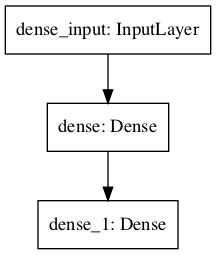

In [37]:
tf.keras.utils.plot_model(model_sig)

Fitting the Sigmoid model and training the algorithm on the data sets. 100 iterations, and split for validation of 20%

In [38]:
train_hist = model_sig.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=True, callbacks=[tensorboard_callback])

Epoch 1/100
43/43 [==============================] - 1s 22ms/step - loss: 4183.9409 - mae: 64.0231 - mse: 4183.9409 - val_loss: 3153.9988 - val_mae: 55.5958 - val_mse: 3153.9988
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 2762.2948 - mae: 51.8526 - mse: 2762.2948 - val_loss: 1776.5676 - val_mae: 41.2797 - val_mse: 1776.5676
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 1488.8022 - mae: 37.4514 - mse: 1488.8022 - val_loss: 847.3225 - val_mae: 27.8660 - val_mse: 847.3225
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 709.0436 - mae: 25.1746 - mse: 709.0436 - val_loss: 371.7941 - val_mae: 17.5409 - val_mse: 371.7941
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 311.8018 - mae: 15.7884 - mse: 311.8018 - val_loss: 166.2381 - val_mae: 11.1049 - val_mse: 166.2381
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 144.1196 - mae: 10.2766 - mse: 144.1196 - val_loss:

43/43 [==============================] - 0s 4ms/step - loss: 6.3939 - mae: 1.8437 - mse: 6.3939 - val_loss: 8.1842 - val_mae: 2.0082 - val_mse: 8.1842
Epoch 51/100
43/43 [==============================] - 0s 4ms/step - loss: 6.3490 - mae: 1.7769 - mse: 6.3490 - val_loss: 8.0702 - val_mae: 1.9867 - val_mse: 8.0702
Epoch 52/100
43/43 [==============================] - 0s 3ms/step - loss: 6.2997 - mae: 1.8166 - mse: 6.2997 - val_loss: 8.2083 - val_mae: 2.0210 - val_mse: 8.2083
Epoch 53/100
43/43 [==============================] - 0s 3ms/step - loss: 6.7222 - mae: 1.8910 - mse: 6.7222 - val_loss: 8.3838 - val_mae: 2.0228 - val_mse: 8.3838
Epoch 54/100
43/43 [==============================] - 0s 4ms/step - loss: 6.3344 - mae: 1.8083 - mse: 6.3344 - val_loss: 7.8066 - val_mae: 1.9290 - val_mse: 7.8066
Epoch 55/100
43/43 [==============================] - 0s 3ms/step - loss: 6.0913 - mae: 1.8223 - mse: 6.0913 - val_loss: 7.8622 - val_mae: 1.9338 - val_mse: 7.8622
Epoch 56/100
43/43 [=========

43/43 [==============================] - 0s 2ms/step - loss: 4.2693 - mae: 1.4886 - mse: 4.2693 - val_loss: 5.9138 - val_mae: 1.6922 - val_mse: 5.9138


Loading the sigmoid model training runs on to the tensorboard to measure out the loss, mean squared error, and mean absolute error

In [39]:
%load_ext tensorboard

In [40]:
%tensorboard --logdir slogs --port 8000 --host 127.0.0.1

Creating a seperate log directory for relu model to store the tensordboard logs, after fitting for the model on the training dataset. Also creating a tensorboard callback to use when training the data, to measure loss in each iteration

In [41]:
logdir = os.path.join("rlogs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
 
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq = 1)

Building a multiple layers(first layer has 32 neurons, second 16, third 4, and finally output of 1) sequential neural network with relu activation function with adam optimizer, with a model summary, and a visual chart depicting the flow, with mean square error, and mean absolute error measuring loss at each iteration. 

In [42]:
def build_relu_multiple_layer_model():
    print("Deep Learning model with Relu activation:")
    model_relu = keras.Sequential([layers.Dense(32, input_shape=(x_train.shape[1],), activation='relu'),
                                  layers.Dense(16, activation= 'relu'),
                                  layers.Dense(4, activation='relu'),
                                  layers.Dense(1)])
    model_relu.compile(loss='mse', metrics=['mae', 'mse'], optimizer=optimizers.Adam(learning_rate=0.001))
    model_relu.summary()
    return model_relu
model_relu = build_relu_multiple_layer_model()


Deep Learning model with Relu activation:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                704       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 1,305
Trainable params: 1,305
Non-trainable params: 0
_________________________________________________________________


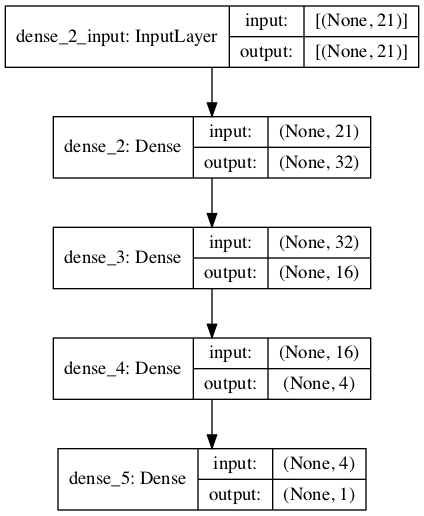

In [43]:
keras.utils.plot_model(model_relu, show_shapes=True)

Fitting the Relu model and training the algorithm on the data sets. 500 iterations, batch size of 100 and split for validation of 20%, and getting the tensorboard callback for mapping.

In [44]:
training_histr= model_relu.fit(x_train, y_train, validation_split=0.2, epochs= 500, batch_size=100, callbacks=[tensorboard_callback])

Epoch 1/500
14/14 [==============================] - 1s 30ms/step - loss: 4753.3359 - mae: 68.3019 - mse: 4753.3361 - val_loss: 4698.6123 - val_mae: 67.9251 - val_mse: 4698.6123
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 4687.5053 - mae: 67.8677 - mse: 4687.5053 - val_loss: 4620.9673 - val_mae: 67.3547 - val_mse: 4620.9673
Epoch 3/500
14/14 [==============================] - 0s 4ms/step - loss: 4639.7586 - mae: 67.4896 - mse: 4639.7586 - val_loss: 4523.3345 - val_mae: 66.6344 - val_mse: 4523.3340
Epoch 4/500
14/14 [==============================] - 0s 4ms/step - loss: 4475.9645 - mae: 66.2935 - mse: 4475.9645 - val_loss: 4393.7944 - val_mae: 65.6735 - val_mse: 4393.7939
Epoch 5/500
14/14 [==============================] - 0s 4ms/step - loss: 4330.4270 - mae: 65.2003 - mse: 4330.4270 - val_loss: 4223.0952 - val_mae: 64.3876 - val_mse: 4223.0952
Epoch 6/500
14/14 [==============================] - 0s 4ms/step - loss: 4138.3145 - mae: 63.7414 - mse: 4138.3150

14/14 [==============================] - 0s 4ms/step - loss: 68.3891 - mae: 6.2716 - mse: 68.3891 - val_loss: 61.1614 - val_mae: 5.9063 - val_mse: 61.1614
Epoch 49/500
14/14 [==============================] - 0s 6ms/step - loss: 58.1682 - mae: 5.9252 - mse: 58.1682 - val_loss: 59.6214 - val_mae: 5.8246 - val_mse: 59.6214
Epoch 50/500
14/14 [==============================] - 0s 6ms/step - loss: 60.1291 - mae: 6.0514 - mse: 60.1291 - val_loss: 58.2469 - val_mae: 5.7573 - val_mse: 58.2469
Epoch 51/500
14/14 [==============================] - 0s 6ms/step - loss: 60.0146 - mae: 5.9494 - mse: 60.0146 - val_loss: 57.2390 - val_mae: 5.7024 - val_mse: 57.2390
Epoch 52/500
14/14 [==============================] - 0s 6ms/step - loss: 57.7059 - mae: 5.9165 - mse: 57.7059 - val_loss: 55.9383 - val_mae: 5.6415 - val_mse: 55.9383
Epoch 53/500
14/14 [==============================] - 0s 5ms/step - loss: 56.8373 - mae: 5.8023 - mse: 56.8373 - val_loss: 54.7830 - val_mae: 5.5841 - val_mse: 54.7830
Epoch

Epoch 97/500
14/14 [==============================] - 0s 6ms/step - loss: 23.9091 - mae: 3.7304 - mse: 23.9091 - val_loss: 26.6167 - val_mae: 3.9030 - val_mse: 26.6167
Epoch 98/500
14/14 [==============================] - 0s 7ms/step - loss: 22.8232 - mae: 3.6736 - mse: 22.8232 - val_loss: 26.4514 - val_mae: 3.8931 - val_mse: 26.4514
Epoch 99/500
14/14 [==============================] - 0s 6ms/step - loss: 21.3634 - mae: 3.5293 - mse: 21.3634 - val_loss: 25.9159 - val_mae: 3.8574 - val_mse: 25.9159
Epoch 100/500
14/14 [==============================] - 0s 6ms/step - loss: 21.4607 - mae: 3.5591 - mse: 21.4607 - val_loss: 25.4793 - val_mae: 3.8184 - val_mse: 25.4793
Epoch 101/500
14/14 [==============================] - 0s 7ms/step - loss: 22.8267 - mae: 3.5914 - mse: 22.8267 - val_loss: 25.3092 - val_mae: 3.8126 - val_mse: 25.3092
Epoch 102/500
14/14 [==============================] - 0s 6ms/step - loss: 23.0755 - mae: 3.6784 - mse: 23.0755 - val_loss: 24.6941 - val_mae: 3.7654 - val_ms

14/14 [==============================] - 0s 6ms/step - loss: 12.9003 - mae: 2.7332 - mse: 12.9003 - val_loss: 14.7959 - val_mae: 2.9202 - val_mse: 14.7959
Epoch 146/500
14/14 [==============================] - 0s 5ms/step - loss: 12.0990 - mae: 2.6657 - mse: 12.0990 - val_loss: 14.7137 - val_mae: 2.9062 - val_mse: 14.7137
Epoch 147/500
14/14 [==============================] - 0s 5ms/step - loss: 13.2046 - mae: 2.7503 - mse: 13.2046 - val_loss: 14.6190 - val_mae: 2.9033 - val_mse: 14.6190
Epoch 148/500
14/14 [==============================] - 0s 5ms/step - loss: 11.9541 - mae: 2.6067 - mse: 11.9541 - val_loss: 14.5034 - val_mae: 2.8944 - val_mse: 14.5034
Epoch 149/500
14/14 [==============================] - 0s 6ms/step - loss: 12.5964 - mae: 2.6799 - mse: 12.5964 - val_loss: 14.4473 - val_mae: 2.8832 - val_mse: 14.4473
Epoch 150/500
14/14 [==============================] - 0s 6ms/step - loss: 12.9944 - mae: 2.7529 - mse: 12.9944 - val_loss: 14.2907 - val_mae: 2.8633 - val_mse: 14.2907


Epoch 194/500
14/14 [==============================] - 0s 6ms/step - loss: 9.3260 - mae: 2.3127 - mse: 9.3260 - val_loss: 11.2491 - val_mae: 2.4819 - val_mse: 11.2491
Epoch 195/500
14/14 [==============================] - 0s 7ms/step - loss: 9.5203 - mae: 2.3556 - mse: 9.5203 - val_loss: 11.1361 - val_mae: 2.4672 - val_mse: 11.1361
Epoch 196/500
14/14 [==============================] - 0s 9ms/step - loss: 9.7317 - mae: 2.3082 - mse: 9.7317 - val_loss: 11.0820 - val_mae: 2.4607 - val_mse: 11.0820
Epoch 197/500
14/14 [==============================] - 0s 10ms/step - loss: 9.2284 - mae: 2.2900 - mse: 9.2284 - val_loss: 11.0241 - val_mae: 2.4630 - val_mse: 11.0241
Epoch 198/500
14/14 [==============================] - 0s 7ms/step - loss: 9.4645 - mae: 2.3140 - mse: 9.4645 - val_loss: 11.0422 - val_mae: 2.4504 - val_mse: 11.0422
Epoch 199/500
14/14 [==============================] - 0s 5ms/step - loss: 9.4129 - mae: 2.3139 - mse: 9.4129 - val_loss: 10.9312 - val_mae: 2.4458 - val_mse: 10.93

14/14 [==============================] - 0s 5ms/step - loss: 7.7720 - mae: 2.1101 - mse: 7.7720 - val_loss: 9.6708 - val_mae: 2.2696 - val_mse: 9.6708
Epoch 244/500
14/14 [==============================] - 0s 5ms/step - loss: 7.4469 - mae: 2.0711 - mse: 7.4469 - val_loss: 9.6424 - val_mae: 2.2802 - val_mse: 9.6424
Epoch 245/500
14/14 [==============================] - 0s 5ms/step - loss: 7.3417 - mae: 2.0693 - mse: 7.3417 - val_loss: 9.7821 - val_mae: 2.2774 - val_mse: 9.7821
Epoch 246/500
14/14 [==============================] - 0s 5ms/step - loss: 7.8105 - mae: 2.1006 - mse: 7.8105 - val_loss: 9.6252 - val_mae: 2.2735 - val_mse: 9.6252
Epoch 247/500
14/14 [==============================] - 0s 5ms/step - loss: 7.7892 - mae: 2.1232 - mse: 7.7892 - val_loss: 9.9641 - val_mae: 2.3170 - val_mse: 9.9641
Epoch 248/500
14/14 [==============================] - 0s 8ms/step - loss: 7.1696 - mae: 2.0439 - mse: 7.1696 - val_loss: 9.5258 - val_mae: 2.2607 - val_mse: 9.5258
Epoch 249/500
14/14 [===

Epoch 293/500
14/14 [==============================] - 0s 4ms/step - loss: 6.7750 - mae: 1.9498 - mse: 6.7750 - val_loss: 8.8852 - val_mae: 2.1646 - val_mse: 8.8852
Epoch 294/500
14/14 [==============================] - 0s 4ms/step - loss: 6.6020 - mae: 1.9046 - mse: 6.6020 - val_loss: 8.7241 - val_mae: 2.1505 - val_mse: 8.7241
Epoch 295/500
14/14 [==============================] - 0s 4ms/step - loss: 7.0338 - mae: 2.0203 - mse: 7.0338 - val_loss: 8.7232 - val_mae: 2.1683 - val_mse: 8.7232
Epoch 296/500
14/14 [==============================] - 0s 4ms/step - loss: 6.8573 - mae: 1.9994 - mse: 6.8573 - val_loss: 8.7187 - val_mae: 2.1475 - val_mse: 8.7187
Epoch 297/500
14/14 [==============================] - 0s 4ms/step - loss: 6.1449 - mae: 1.8686 - mse: 6.1449 - val_loss: 8.7036 - val_mae: 2.1365 - val_mse: 8.7036
Epoch 298/500
14/14 [==============================] - 0s 6ms/step - loss: 6.8251 - mae: 1.9739 - mse: 6.8251 - val_loss: 8.7144 - val_mae: 2.1613 - val_mse: 8.7144
Epoch 299/

Epoch 343/500
14/14 [==============================] - 0s 4ms/step - loss: 5.9478 - mae: 1.8501 - mse: 5.9478 - val_loss: 8.0693 - val_mae: 2.0598 - val_mse: 8.0693
Epoch 344/500
14/14 [==============================] - 0s 4ms/step - loss: 6.5329 - mae: 1.9114 - mse: 6.5329 - val_loss: 8.0755 - val_mae: 2.0622 - val_mse: 8.0755
Epoch 345/500
14/14 [==============================] - 0s 4ms/step - loss: 6.2836 - mae: 1.8666 - mse: 6.2836 - val_loss: 8.1163 - val_mae: 2.0872 - val_mse: 8.1163
Epoch 346/500
14/14 [==============================] - 0s 4ms/step - loss: 5.8272 - mae: 1.8476 - mse: 5.8272 - val_loss: 8.0018 - val_mae: 2.0640 - val_mse: 8.0018
Epoch 347/500
14/14 [==============================] - 0s 4ms/step - loss: 5.7431 - mae: 1.8135 - mse: 5.7431 - val_loss: 8.1156 - val_mae: 2.0594 - val_mse: 8.1156
Epoch 348/500
14/14 [==============================] - 0s 4ms/step - loss: 5.2830 - mae: 1.7431 - mse: 5.2830 - val_loss: 8.0037 - val_mae: 2.0673 - val_mse: 8.0037
Epoch 349/

Epoch 393/500
14/14 [==============================] - 0s 3ms/step - loss: 5.7952 - mae: 1.7675 - mse: 5.7952 - val_loss: 7.8511 - val_mae: 2.0349 - val_mse: 7.8511
Epoch 394/500
14/14 [==============================] - 0s 5ms/step - loss: 5.1804 - mae: 1.7037 - mse: 5.1804 - val_loss: 7.7534 - val_mae: 2.0008 - val_mse: 7.7534
Epoch 395/500
14/14 [==============================] - 0s 4ms/step - loss: 5.2208 - mae: 1.7257 - mse: 5.2208 - val_loss: 7.7151 - val_mae: 2.0094 - val_mse: 7.7151
Epoch 396/500
14/14 [==============================] - 0s 4ms/step - loss: 5.4085 - mae: 1.7368 - mse: 5.4085 - val_loss: 7.7334 - val_mae: 2.0027 - val_mse: 7.7334
Epoch 397/500
14/14 [==============================] - 0s 4ms/step - loss: 5.3107 - mae: 1.7324 - mse: 5.3107 - val_loss: 7.6243 - val_mae: 2.0111 - val_mse: 7.6243
Epoch 398/500
14/14 [==============================] - 0s 3ms/step - loss: 4.9862 - mae: 1.6720 - mse: 4.9862 - val_loss: 7.7593 - val_mae: 2.0286 - val_mse: 7.7593
Epoch 399/

Epoch 443/500
14/14 [==============================] - 0s 3ms/step - loss: 5.3801 - mae: 1.7201 - mse: 5.3801 - val_loss: 7.7060 - val_mae: 1.9968 - val_mse: 7.7060
Epoch 444/500
14/14 [==============================] - 0s 3ms/step - loss: 5.2685 - mae: 1.6853 - mse: 5.2685 - val_loss: 7.5021 - val_mae: 1.9861 - val_mse: 7.5021
Epoch 445/500
14/14 [==============================] - 0s 3ms/step - loss: 5.1645 - mae: 1.6827 - mse: 5.1645 - val_loss: 7.5797 - val_mae: 1.9634 - val_mse: 7.5797
Epoch 446/500
14/14 [==============================] - 0s 4ms/step - loss: 5.1009 - mae: 1.6569 - mse: 5.1009 - val_loss: 7.5854 - val_mae: 2.0008 - val_mse: 7.5854
Epoch 447/500
14/14 [==============================] - 0s 4ms/step - loss: 5.2082 - mae: 1.6790 - mse: 5.2082 - val_loss: 7.5362 - val_mae: 1.9828 - val_mse: 7.5362
Epoch 448/500
14/14 [==============================] - 0s 3ms/step - loss: 4.9595 - mae: 1.6348 - mse: 4.9595 - val_loss: 7.5797 - val_mae: 1.9630 - val_mse: 7.5797
Epoch 449/

Epoch 493/500
14/14 [==============================] - 0s 3ms/step - loss: 4.7027 - mae: 1.5925 - mse: 4.7027 - val_loss: 7.5313 - val_mae: 1.9607 - val_mse: 7.5313
Epoch 494/500
14/14 [==============================] - 0s 3ms/step - loss: 4.6930 - mae: 1.5976 - mse: 4.6930 - val_loss: 7.5013 - val_mae: 1.9636 - val_mse: 7.5013
Epoch 495/500
14/14 [==============================] - 0s 3ms/step - loss: 4.6134 - mae: 1.5856 - mse: 4.6134 - val_loss: 7.6384 - val_mae: 1.9724 - val_mse: 7.6384
Epoch 496/500
14/14 [==============================] - 0s 3ms/step - loss: 4.6488 - mae: 1.5778 - mse: 4.6488 - val_loss: 7.6697 - val_mae: 1.9752 - val_mse: 7.6697
Epoch 497/500
14/14 [==============================] - 0s 4ms/step - loss: 4.9851 - mae: 1.6615 - mse: 4.9851 - val_loss: 7.5250 - val_mae: 1.9577 - val_mse: 7.5250
Epoch 498/500
14/14 [==============================] - 0s 3ms/step - loss: 4.3355 - mae: 1.5431 - mse: 4.3355 - val_loss: 7.6474 - val_mae: 1.9710 - val_mse: 7.6474
Epoch 499/

Loading the relu model training runs on to the tensorboard to measure out the loss, mean squared error, and mean absolute error

In [45]:
%tensorboard --logdir rlogs --port 8001 --host 127.0.0.1

Creating a log directory to store sgd model tensordboard logs, after fitting for the model on the training dataset. Also creating a tensorboard callback to use when training the data, to measure loss in each iteration

In [46]:
logdir = os.path.join("sglogs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
 
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq = 1)

Building a multiple layers(first layer has 32 neurons, second 16, third 4, and finally output of 1) sequential neural network with relu activation function with Stochastic Gradient Descent optimizer, with a model summary, and a visual chart depicting the flow, with mean square error, and mean absolute error measuring loss at each iteration. 

In [47]:
def build_sgd_multiple_layer_model():
    print("Deep Learning Neural Network using SGD as loss function")
    model_sgd = keras.Sequential([layers.Dense(32, input_shape=(x_train.shape[1],), activation='relu'),
                                 layers.Dense(16, activation='relu'),
                                 layers.Dense(4, activation='relu'),
                                 layers.Dense(1)])
    model_sgd.compile(loss='mse', metrics=['mae','mse'], optimizer=optimizers.SGD(learning_rate=0.001))
    
    model_sgd.summary()
    
    return model_sgd
model_sgd = build_sgd_multiple_layer_model()

Deep Learning Neural Network using SGD as loss function
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                704       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 1,305
Trainable params: 1,305
Non-trainable params: 0
_________________________________________________________________


Fitting the Stochastic Gradient Descent model and training the algorithm on the data sets. 100 iterations, batch size of 100 and split for validation of 20%, and getting the tensorboard callback for mapping.

In [48]:
train_histsgd= model_sgd.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=100,callbacks=[tensorboard_callback])

Epoch 1/100
14/14 [==============================] - 1s 21ms/step - loss: 4032.2557 - mae: 61.1578 - mse: 4032.2557 - val_loss: 4523.1313 - val_mae: 66.5666 - val_mse: 4523.1313
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 4291.5139 - mae: 64.5266 - mse: 4291.5138 - val_loss: 2357.6294 - val_mae: 48.1941 - val_mse: 2357.6296
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 2580.8048 - mae: 47.2929 - mse: 2580.8048 - val_loss: 1257.0231 - val_mae: 32.4782 - val_mse: 1257.0231
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 556.1082 - mae: 19.6316 - mse: 556.1082 - val_loss: 94.9365 - val_mae: 8.6316 - val_mse: 94.9365
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 93.2945 - mae: 8.2326 - mse: 93.2945 - val_loss: 26.3130 - val_mae: 3.9863 - val_mse: 26.3130
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 29.7469 - mae: 4.2538 - mse: 29.7469 - val_loss: 42.2953 -

Epoch 50/100
14/14 [==============================] - 0s 5ms/step - loss: 6.0511 - mae: 1.8751 - mse: 6.0511 - val_loss: 8.3521 - val_mae: 2.1722 - val_mse: 8.3521
Epoch 51/100
14/14 [==============================] - 0s 4ms/step - loss: 5.4075 - mae: 1.7393 - mse: 5.4075 - val_loss: 9.0551 - val_mae: 2.3189 - val_mse: 9.0551
Epoch 52/100
14/14 [==============================] - 0s 4ms/step - loss: 7.9250 - mae: 2.1871 - mse: 7.9250 - val_loss: 9.4686 - val_mae: 2.4224 - val_mse: 9.4686
Epoch 53/100
14/14 [==============================] - 0s 4ms/step - loss: 8.0412 - mae: 2.2509 - mse: 8.0412 - val_loss: 7.9405 - val_mae: 2.1209 - val_mse: 7.9405
Epoch 54/100
14/14 [==============================] - 0s 5ms/step - loss: 5.9007 - mae: 1.8180 - mse: 5.9007 - val_loss: 7.2723 - val_mae: 1.8509 - val_mse: 7.2723
Epoch 55/100
14/14 [==============================] - 0s 5ms/step - loss: 5.6472 - mae: 1.7400 - mse: 5.6472 - val_loss: 7.1881 - val_mae: 1.8812 - val_mse: 7.1881
Epoch 56/100
14/

Epoch 100/100
14/14 [==============================] - 0s 4ms/step - loss: 11.8899 - mae: 2.8947 - mse: 11.8899 - val_loss: 15.3235 - val_mae: 3.2750 - val_mse: 15.3235


Loading the Stochastic Gradient Descent model training runs on to the tensorboard to measure out the loss, mean squared error, and mean absolute error

In [49]:
%tensorboard --logdir sglogs --port 8002 --host 127.0.0.1

Creating a log directory to store RMSprop model tensordboard logs, after fitting for the model on the training dataset. Also creating a tensorboard callback to use when training the data, to measure loss in each iteration

In [50]:
logdir = os.path.join("rmlogs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
 
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq = 1)

Building a multiple layers(first layer has 16 neurons, second 8, third 4, and finally output of 1) sequential neural network with relu activation function with RMSprop optimizer, with a model summary, and a visual chart depicting the flow, with mean square error, and mean absolute error measuring loss at each iteration. 

In [51]:
def build_RMSprop_multiple_layer_model():
    print("Deep Learning Neural Network using RMSprop as loss function")
    model_rms = keras.Sequential([layers.Dense(16, input_shape=(x_train.shape[1],), activation='elu'),
                                 layers.Dense(8, activation='elu'),
                                 layers.Dense(4, activation='elu'),
                                 layers.Dense(1)])
    model_rms.compile(loss='mse', metrics=['mae', 'mse'], optimizer=optimizers.RMSprop(learning_rate=0.01))
    model_rms.summary()
    return model_rms
model_rms = build_RMSprop_multiple_layer_model()

Deep Learning Neural Network using RMSprop as loss function
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                352       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 5         
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


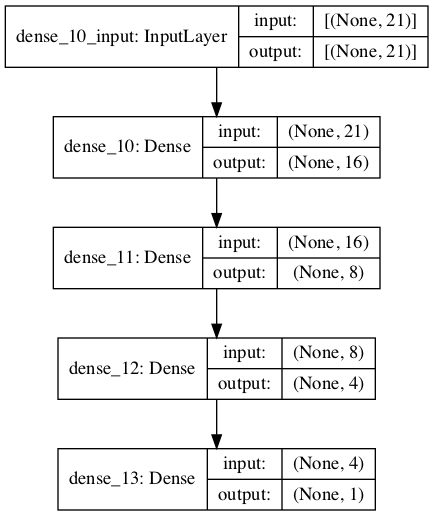

In [52]:
keras.utils.plot_model(model_rms, show_shapes=True)

Fitting the RMSprop model and training the algorithm on the data sets. 100 iterations, batch size of 100 and split for validation of 20%, and getting the tensorboard callback for mapping.

In [53]:
train_hist_rms = model_rms.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=100, callbacks = [tensorboard_callback])

Epoch 1/100
14/14 [==============================] - 1s 24ms/step - loss: 4422.7689 - mae: 65.8931 - mse: 4422.7688 - val_loss: 2931.5547 - val_mae: 53.8513 - val_mse: 2931.5547
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 2170.5680 - mae: 45.2102 - mse: 2170.5680 - val_loss: 395.1360 - val_mae: 16.4331 - val_mse: 395.1360
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 254.0231 - mae: 12.3661 - mse: 254.0231 - val_loss: 116.7632 - val_mae: 8.0156 - val_mse: 116.7632
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 104.7753 - mae: 7.4536 - mse: 104.7753 - val_loss: 64.1203 - val_mae: 5.7419 - val_mse: 64.1203
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 49.1876 - mae: 5.1818 - mse: 49.1876 - val_loss: 39.5943 - val_mae: 4.6094 - val_mse: 39.5943
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 34.6419 - mae: 4.4614 - mse: 34.6419 - val_loss: 30.4384 - val_mae

Epoch 50/100
14/14 [==============================] - 0s 4ms/step - loss: 8.0961 - mae: 2.1619 - mse: 8.0961 - val_loss: 8.8187 - val_mae: 2.2806 - val_mse: 8.8187
Epoch 51/100
14/14 [==============================] - 0s 4ms/step - loss: 13.7942 - mae: 2.8457 - mse: 13.7942 - val_loss: 10.4165 - val_mae: 2.3137 - val_mse: 10.4165
Epoch 52/100
14/14 [==============================] - 0s 4ms/step - loss: 11.3284 - mae: 2.5759 - mse: 11.3284 - val_loss: 8.8425 - val_mae: 2.2649 - val_mse: 8.8425
Epoch 53/100
14/14 [==============================] - 0s 6ms/step - loss: 10.3796 - mae: 2.4502 - mse: 10.3796 - val_loss: 20.8681 - val_mae: 3.7723 - val_mse: 20.8681
Epoch 54/100
14/14 [==============================] - 0s 6ms/step - loss: 12.9896 - mae: 2.8550 - mse: 12.9896 - val_loss: 15.8711 - val_mae: 3.3454 - val_mse: 15.8711
Epoch 55/100
14/14 [==============================] - 0s 7ms/step - loss: 10.5851 - mae: 2.5734 - mse: 10.5851 - val_loss: 16.6626 - val_mae: 3.4556 - val_mse: 16.662

14/14 [==============================] - 0s 4ms/step - loss: 9.6871 - mae: 2.4578 - mse: 9.6871 - val_loss: 9.4428 - val_mae: 2.3951 - val_mse: 9.4428
Epoch 100/100
14/14 [==============================] - 0s 6ms/step - loss: 9.5333 - mae: 2.4454 - mse: 9.5333 - val_loss: 7.4936 - val_mae: 2.0623 - val_mse: 7.4936


Loading the RMS Prop model training runs on to the tensorboard to measure out the loss, mean squared error, and mean absolute error

In [54]:
%tensorboard --logdir rmlogs --port 8003 --host 127.0.0.1

### Model Evaluation

Invoking the build and train traditional model function to predict and score the linear regression model on the data. 3 inputs as needed: data file, value to predict(Life Expectancy), and the type of model (In this case Linear model using the linear_reg function above). Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values, and finally a visual representation of accuracy.


Linear Regression
Training Score:  0.8372306956904465
Testing Score:  0.8358987845142395
     y_test     y_pred
76     68.0  57.616663
144    65.7  65.296264
372    73.5  70.468480
203    72.6  75.477742
64     69.5  76.269889
68     62.0  64.723597
56     44.8  47.993444
213    58.7  58.168606
112    67.9  62.177099
7      73.2  71.558481


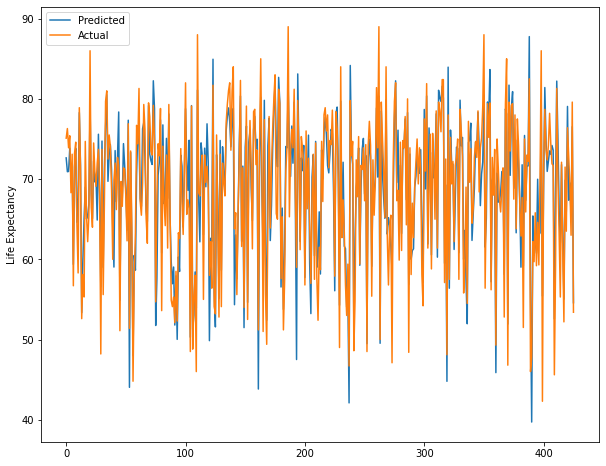

In [55]:
linear_reg_e = build_and_train_traditional_model(data, target, linear_reg)

Invoking the build and train traditional model function to predict and score the Lasso regression model on the data. 3 inputs as needed: data file, value to predict(Life Expectancy), and the type of model (In this case Lasso model using the lasso_reg function above). Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values, and finally a visual representation of accuracy.



Lasso Regression
Training Score:  0.8053807957495787
Testing Score:  0.8087314433043817
     y_test     y_pred
304    68.7  75.639851
152    52.5  56.094501
174    80.0  77.878974
339    73.8  75.539024
397    69.9  62.523061
185    74.0  73.419136
100    82.0  77.679716
343    74.7  73.494507
126    75.5  72.227575
95     62.6  60.749360


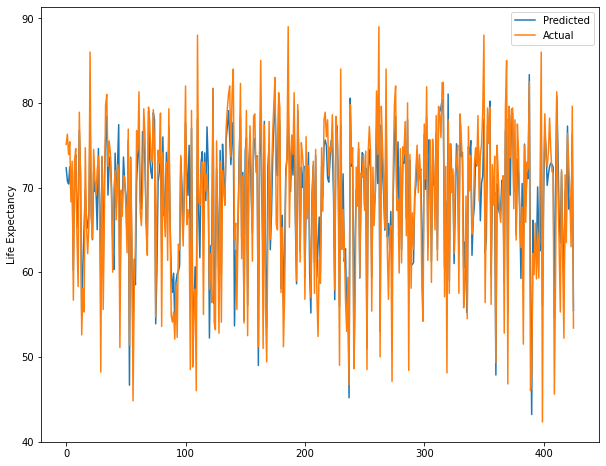

In [56]:
lasso_reg_e = build_and_train_traditional_model(data, target, lasso_reg)

Invoking the build and train traditional model function to predict and score the Ridge regression model on the data. 3 inputs as needed: data file, value to predict(Life Expectancy), and the type of model (In this case Ridge model using the ridge_reg function above). Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values, and finally a visual representation of accuracy.



Ridge Regression
Training Score:  0.8370592548190221
Testing Score:  0.8365432858352586
     y_test     y_pred
327    72.8  73.950776
409    45.6  52.443596
334    59.1  63.617287
53     51.4  43.983557
209    74.5  74.580953
408    71.7  73.586123
228    69.4  70.742616
98     63.1  64.016942
188    73.4  70.335327
54     73.5  73.342389


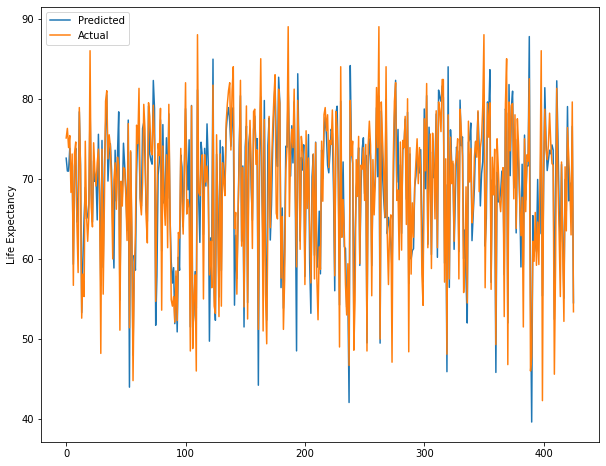

In [57]:
ridge_reg_e = build_and_train_traditional_model(data, target, ridge_reg)

Invoking the build and train traditional model function to predict and score the Stochastic gradient descent model on the data. 3 inputs as needed: data file, value to predict(Life Expectancy), and the type of model (In this case SGD model using the sgd function above). Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values, and finally a visual representation of accuracy.



Stochastic Gradient Descent
Training Score:  0.8305345171233156
Testing Score:  0.8336249147780569
     y_test     y_pred
220    71.4  70.550386
335    69.0  58.215184
212    61.5  66.122779
8      74.6  73.720043
182    51.2  54.190923
81     74.1  76.953147
291    62.7  61.139161
204    64.4  59.389101
371    79.6  81.867825
288    73.9  73.079812


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


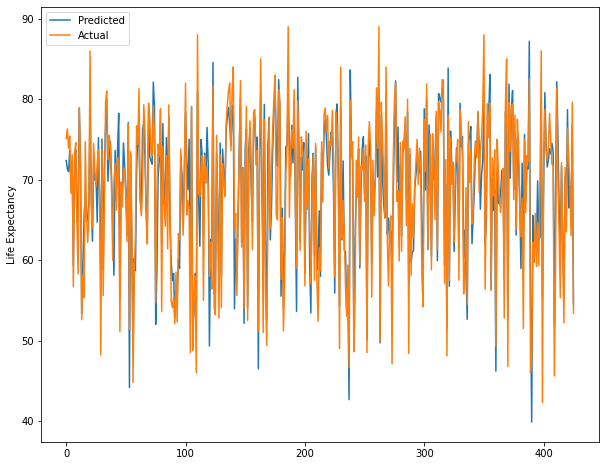

In [58]:
sgd_e = build_and_train_traditional_model(data, target, sgd)

Invoking the build and train traditional model function to predict and score the Neural Network Multilayer Preceptron regression model on the data. 3 inputs as needed: data file, value to predict(Life Expectancy ), and the type of model (In this case MLP regressor model using the mlp function above). Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values, and finally a visual representation of accuracy.


Multilayer Preceptron Regressor
Iteration 1, loss = 2374.80435857
Iteration 2, loss = 2357.11640994
Iteration 3, loss = 2339.36245370
Iteration 4, loss = 2321.73204031
Iteration 5, loss = 2303.83385050
Iteration 6, loss = 2285.50089227
Iteration 7, loss = 2266.56844766
Iteration 8, loss = 2246.81436426
Iteration 9, loss = 2226.24715626
Iteration 10, loss = 2204.79927259
Iteration 11, loss = 2182.11590014
Iteration 12, loss = 2157.84099865
Iteration 13, loss = 2132.60257956
Iteration 14, loss = 2106.20249809
Iteration 15, loss = 2078.04666140
Iteration 16, loss = 2048.48850574
Iteration 17, loss = 2017.58827426
Iteration 18, loss = 1984.86204956
Iteration 19, loss = 1950.83904916
Iteration 20, loss = 1915.33474425
Iteration 21, loss = 1878.19835396
Iteration 22, loss = 1840.10978161
Iteration 23, loss = 1800.62923080
Iteration 24, loss = 1759.69347694
Iteration 25, loss = 1717.90794026
Iteration 26, loss = 1675.34085779
Iteration 27, loss = 1631.61374512
Iteration 28, loss = 1587.339699

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 41, loss = 1012.69973596
Iteration 42, loss = 972.39569557
Iteration 43, loss = 932.91301407
Iteration 44, loss = 894.30348348
Iteration 45, loss = 856.95261150
Iteration 46, loss = 820.46336581
Iteration 47, loss = 785.06924449
Iteration 48, loss = 750.98727792
Iteration 49, loss = 717.84686033
Iteration 50, loss = 686.03924229
Iteration 51, loss = 655.37884572
Iteration 52, loss = 625.97011188
Iteration 53, loss = 597.58503768
Iteration 54, loss = 570.61145841
Iteration 55, loss = 544.70081144
Iteration 56, loss = 519.89587335
Iteration 57, loss = 496.50534246
Iteration 58, loss = 474.19653624
Iteration 59, loss = 453.06151904
Iteration 60, loss = 432.93676225
Iteration 61, loss = 413.82744323
Iteration 62, loss = 395.83657556
Iteration 63, loss = 378.83082928
Iteration 64, loss = 362.49224644
Iteration 65, loss = 347.34133025
Iteration 66, loss = 332.98824539
Iteration 67, loss = 319.31400866
Iteration 68, loss = 306.45711133
Iteration 69, loss = 294.56826288
Iteration 70,

Iteration 311, loss = 15.29373484
Iteration 312, loss = 15.18752500
Iteration 313, loss = 15.08636696
Iteration 314, loss = 14.98176553
Iteration 315, loss = 14.88567189
Iteration 316, loss = 14.78642073
Iteration 317, loss = 14.68647879
Iteration 318, loss = 14.58618176
Iteration 319, loss = 14.49374995
Iteration 320, loss = 14.39556227
Iteration 321, loss = 14.30295018
Iteration 322, loss = 14.20847072
Iteration 323, loss = 14.11397484
Iteration 324, loss = 14.02305718
Iteration 325, loss = 13.93130225
Iteration 326, loss = 13.84942015
Iteration 327, loss = 13.74740576
Iteration 328, loss = 13.66226932
Iteration 329, loss = 13.56553446
Iteration 330, loss = 13.48031298
Iteration 331, loss = 13.39217793
Iteration 332, loss = 13.30491465
Iteration 333, loss = 13.21340247
Iteration 334, loss = 13.12839752
Iteration 335, loss = 13.04037628
Iteration 336, loss = 12.95782456
Iteration 337, loss = 12.87542311
Iteration 338, loss = 12.79559300
Iteration 339, loss = 12.72174048
Iteration 340,

Iteration 562, loss = 4.77063611
Iteration 563, loss = 4.76130346
Iteration 564, loss = 4.75066132
Iteration 565, loss = 4.74265266
Iteration 566, loss = 4.72844505
Iteration 567, loss = 4.72361145
Iteration 568, loss = 4.71382419
Iteration 569, loss = 4.70126962
Iteration 570, loss = 4.69997114
Iteration 571, loss = 4.68384352
Iteration 572, loss = 4.68101545
Iteration 573, loss = 4.67151345
Iteration 574, loss = 4.65511714
Iteration 575, loss = 4.65130710
Iteration 576, loss = 4.65247696
Iteration 577, loss = 4.63596151
Iteration 578, loss = 4.62818618
Iteration 579, loss = 4.61975305
Iteration 580, loss = 4.61483833
Iteration 581, loss = 4.60491018
Iteration 582, loss = 4.59866673
Iteration 583, loss = 4.58459849
Iteration 584, loss = 4.57982337
Iteration 585, loss = 4.56882630
Iteration 586, loss = 4.55983317
Iteration 587, loss = 4.56115165
Iteration 588, loss = 4.54840732
Iteration 589, loss = 4.54105957
Iteration 590, loss = 4.53280486
Iteration 591, loss = 4.52408587
Iteration 

Iteration 814, loss = 3.40579137
Iteration 815, loss = 3.40464702
Iteration 816, loss = 3.40088545
Iteration 817, loss = 3.39542640
Iteration 818, loss = 3.39136182
Iteration 819, loss = 3.38450384
Iteration 820, loss = 3.38428101
Iteration 821, loss = 3.38285322
Iteration 822, loss = 3.37792473
Iteration 823, loss = 3.36844144
Iteration 824, loss = 3.37141146
Iteration 825, loss = 3.36717645
Iteration 826, loss = 3.35871280
Iteration 827, loss = 3.36062459
Iteration 828, loss = 3.35827988
Iteration 829, loss = 3.35627535
Iteration 830, loss = 3.35357988
Iteration 831, loss = 3.34939203
Iteration 832, loss = 3.33961186
Iteration 833, loss = 3.32975524
Iteration 834, loss = 3.32906516
Iteration 835, loss = 3.33571438
Iteration 836, loss = 3.32267859
Iteration 837, loss = 3.33037812
Iteration 838, loss = 3.31452569
Iteration 839, loss = 3.32199244
Iteration 840, loss = 3.30962591
Iteration 841, loss = 3.31025270
Iteration 842, loss = 3.30713223
Iteration 843, loss = 3.30549854
Iteration 

Iteration 1080, loss = 2.52751494
Iteration 1081, loss = 2.53304704
Iteration 1082, loss = 2.53015312
Iteration 1083, loss = 2.52074780
Iteration 1084, loss = 2.51960611
Iteration 1085, loss = 2.51324544
Iteration 1086, loss = 2.50917603
Iteration 1087, loss = 2.50574457
Iteration 1088, loss = 2.50478046
Iteration 1089, loss = 2.49982502
Iteration 1090, loss = 2.49912392
Iteration 1091, loss = 2.49702673
Iteration 1092, loss = 2.49620366
Iteration 1093, loss = 2.49185498
Iteration 1094, loss = 2.49542607
Iteration 1095, loss = 2.49957121
Iteration 1096, loss = 2.48992885
Iteration 1097, loss = 2.49938298
Iteration 1098, loss = 2.49646416
Iteration 1099, loss = 2.49052759
Iteration 1100, loss = 2.47594817
Iteration 1101, loss = 2.47641638
Iteration 1102, loss = 2.47733030
Iteration 1103, loss = 2.46729281
Iteration 1104, loss = 2.47095220
Iteration 1105, loss = 2.46506011
Iteration 1106, loss = 2.46462252
Iteration 1107, loss = 2.46884430
Iteration 1108, loss = 2.45625961
Iteration 1109

Iteration 1348, loss = 2.11736240
Iteration 1349, loss = 2.11676783
Iteration 1350, loss = 2.11436982
Iteration 1351, loss = 2.11770871
Iteration 1352, loss = 2.11500465
Iteration 1353, loss = 2.10847424
Iteration 1354, loss = 2.11276733
Iteration 1355, loss = 2.10677567
Iteration 1356, loss = 2.11121062
Iteration 1357, loss = 2.10630356
Iteration 1358, loss = 2.11364098
Iteration 1359, loss = 2.11882035
Iteration 1360, loss = 2.10734165
Iteration 1361, loss = 2.10680716
Iteration 1362, loss = 2.10751313
Iteration 1363, loss = 2.10565689
Iteration 1364, loss = 2.09748139
Iteration 1365, loss = 2.10260609
Iteration 1366, loss = 2.09576180
Iteration 1367, loss = 2.09865572
Iteration 1368, loss = 2.09330006
Iteration 1369, loss = 2.09640011
Iteration 1370, loss = 2.09785992
Iteration 1371, loss = 2.09775249
Iteration 1372, loss = 2.09614958
Iteration 1373, loss = 2.09593579
Iteration 1374, loss = 2.08775731
Iteration 1375, loss = 2.08918570
Iteration 1376, loss = 2.08635689
Iteration 1377

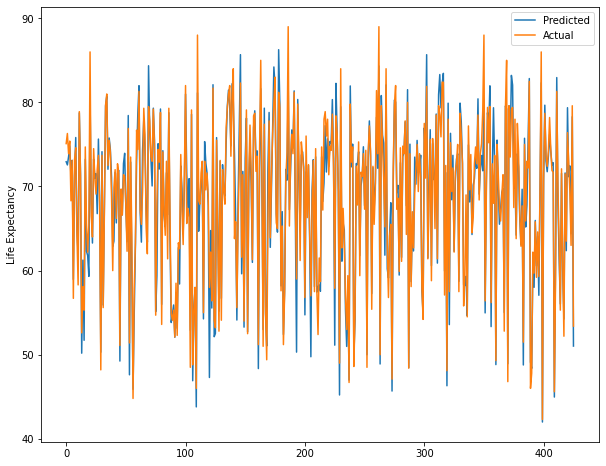

In [59]:
mlp_e = build_and_train_traditional_model(data, target, mlp)

Creating a function evaluating the neural network models by printing out the r2 score for accuracy, with the predicted values vs actual values.



In [60]:
def neural_network_evaluation(model):
    model_e = model
    print("Model evaluation: ", model_e.evaluate(x_train, y_train))
    y_pred = model_e.predict(x_test)
    print("Test score: ", r2_score(y_test, y_pred))
    pred_results = pd.DataFrame({'y_test': y_test.values.flatten(), 'y_pred': y_pred.flatten()}, index=range(len(y_pred)))
    print(pred_results.sample(10))
    plt.figure(figsize=(10, 8))
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test.values, label='Actual')
    plt.ylabel("Life Expectancy")
    plt.legend()
    plt.show()
    
    return model_e

Using the Neural_Network_Evaluation function to predict and score the Single Layer Sigmoid Neural Network algorithm on the data. 1 input as needed: neural network model. Results in order model evaluation(loss, MAE, MSE), Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values.



54/54 [==============================] - 0s 677us/step - loss: 4.6022 - mae: 1.5145 - mse: 4.6022
Model evaluation:  [4.602165699005127, 1.5145046710968018, 4.602165699005127]
Test score:  0.9333250956833036
     y_test     y_pred
414    55.3  56.056580
210    57.7  58.356907
413    63.2  65.140381
23     74.5  73.542068
100    82.0  80.053299
287    48.4  48.610641
156    61.3  62.666790
291    62.7  61.803802
153    71.4  73.237915
114    73.0  69.375153


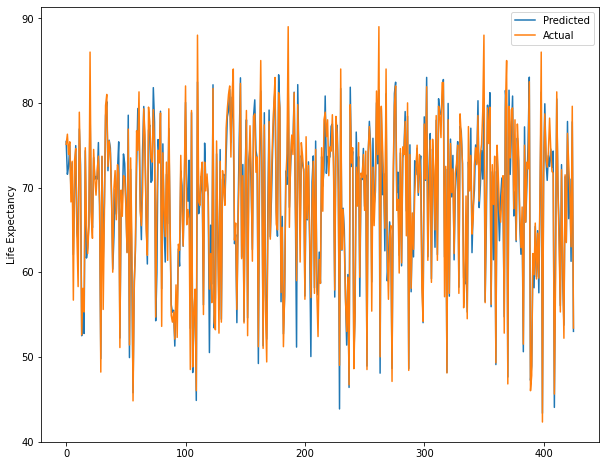

In [61]:
model_sig_e = neural_network_evaluation(model_sig)

Using the Neural_Network_Evaluation function to predict and score the Multi-Layer Relu Neural Network algorithm on the data. 1 input as needed: neural network model (model_relu). Results in order model evaluation(loss, MAE, MSE), Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values.



54/54 [==============================] - 0s 747us/step - loss: 5.1086 - mae: 1.6367 - mse: 5.1086
Model evaluation:  [5.108576774597168, 1.6366556882858276, 5.108576774597168]
Test score:  0.9192088046912151
     y_test     y_pred
343    74.7  72.845886
224    72.2  73.602715
102    67.4  66.803993
385    65.9  67.120636
234    56.8  57.237057
205    57.0  50.274513
99     71.3  70.533165
137    82.0  80.114182
411    81.3  82.567200
405    78.2  72.874802


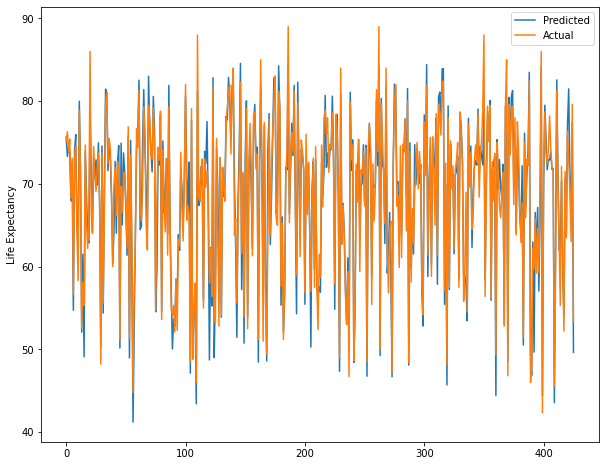

In [62]:
model_relu_e = neural_network_evaluation(model_relu)

Using the Neural_Network_Evaluation function to predict and score the Multi-Layer SGD Neural Network algorithm on the data. 1 input as needed: neural network model (model_sgd). Results in order model evaluation(loss, MAE, MSE), Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values.




54/54 [==============================] - 0s 801us/step - loss: 13.9683 - mae: 3.1771 - mse: 13.9683
Model evaluation:  [13.968348503112793, 3.1771442890167236, 13.968348503112793]
Test score:  0.8215538634725248
     y_test     y_pred
312    79.6  76.644211
116    73.0  74.603188
1      76.3  70.637428
114    73.0  67.021545
80     53.6  54.759071
19     65.4  61.988560
297    71.1  70.525848
28     68.0  65.434456
199    71.8  70.416069
205    57.0  48.848270


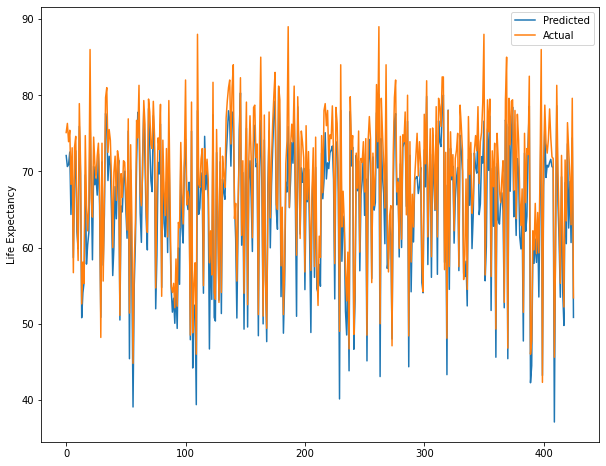

In [63]:
model_sgd_e = neural_network_evaluation(model_sgd)

Using the Neural_Network_Evaluation function to predict and score the Multi-Layer RMSprop Neural Network algorithm on the data. 1 input as needed: neural network model (model_rms). Results in order model evaluation(loss, MAE, MSE), Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values.

54/54 [==============================] - 0s 662us/step - loss: 6.1348 - mae: 1.8714 - mse: 6.1348
Model evaluation:  [6.134838104248047, 1.8714450597763062, 6.134838104248047]
Test score:  0.9159982563640264
     y_test     y_pred
270    56.8  62.677536
51     62.3  63.621090
176    65.7  69.565628
423    63.0  63.369850
365    69.0  71.363884
169    65.1  72.907845
321    57.5  56.673050
116    73.0  76.298988
288    73.9  76.714371
360    49.3  48.068459


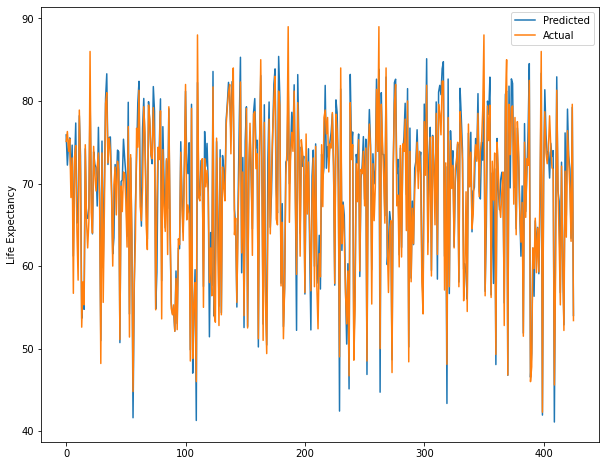

In [64]:
model_rms_e = neural_network_evaluation(model_rms)